In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv("../00_data/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


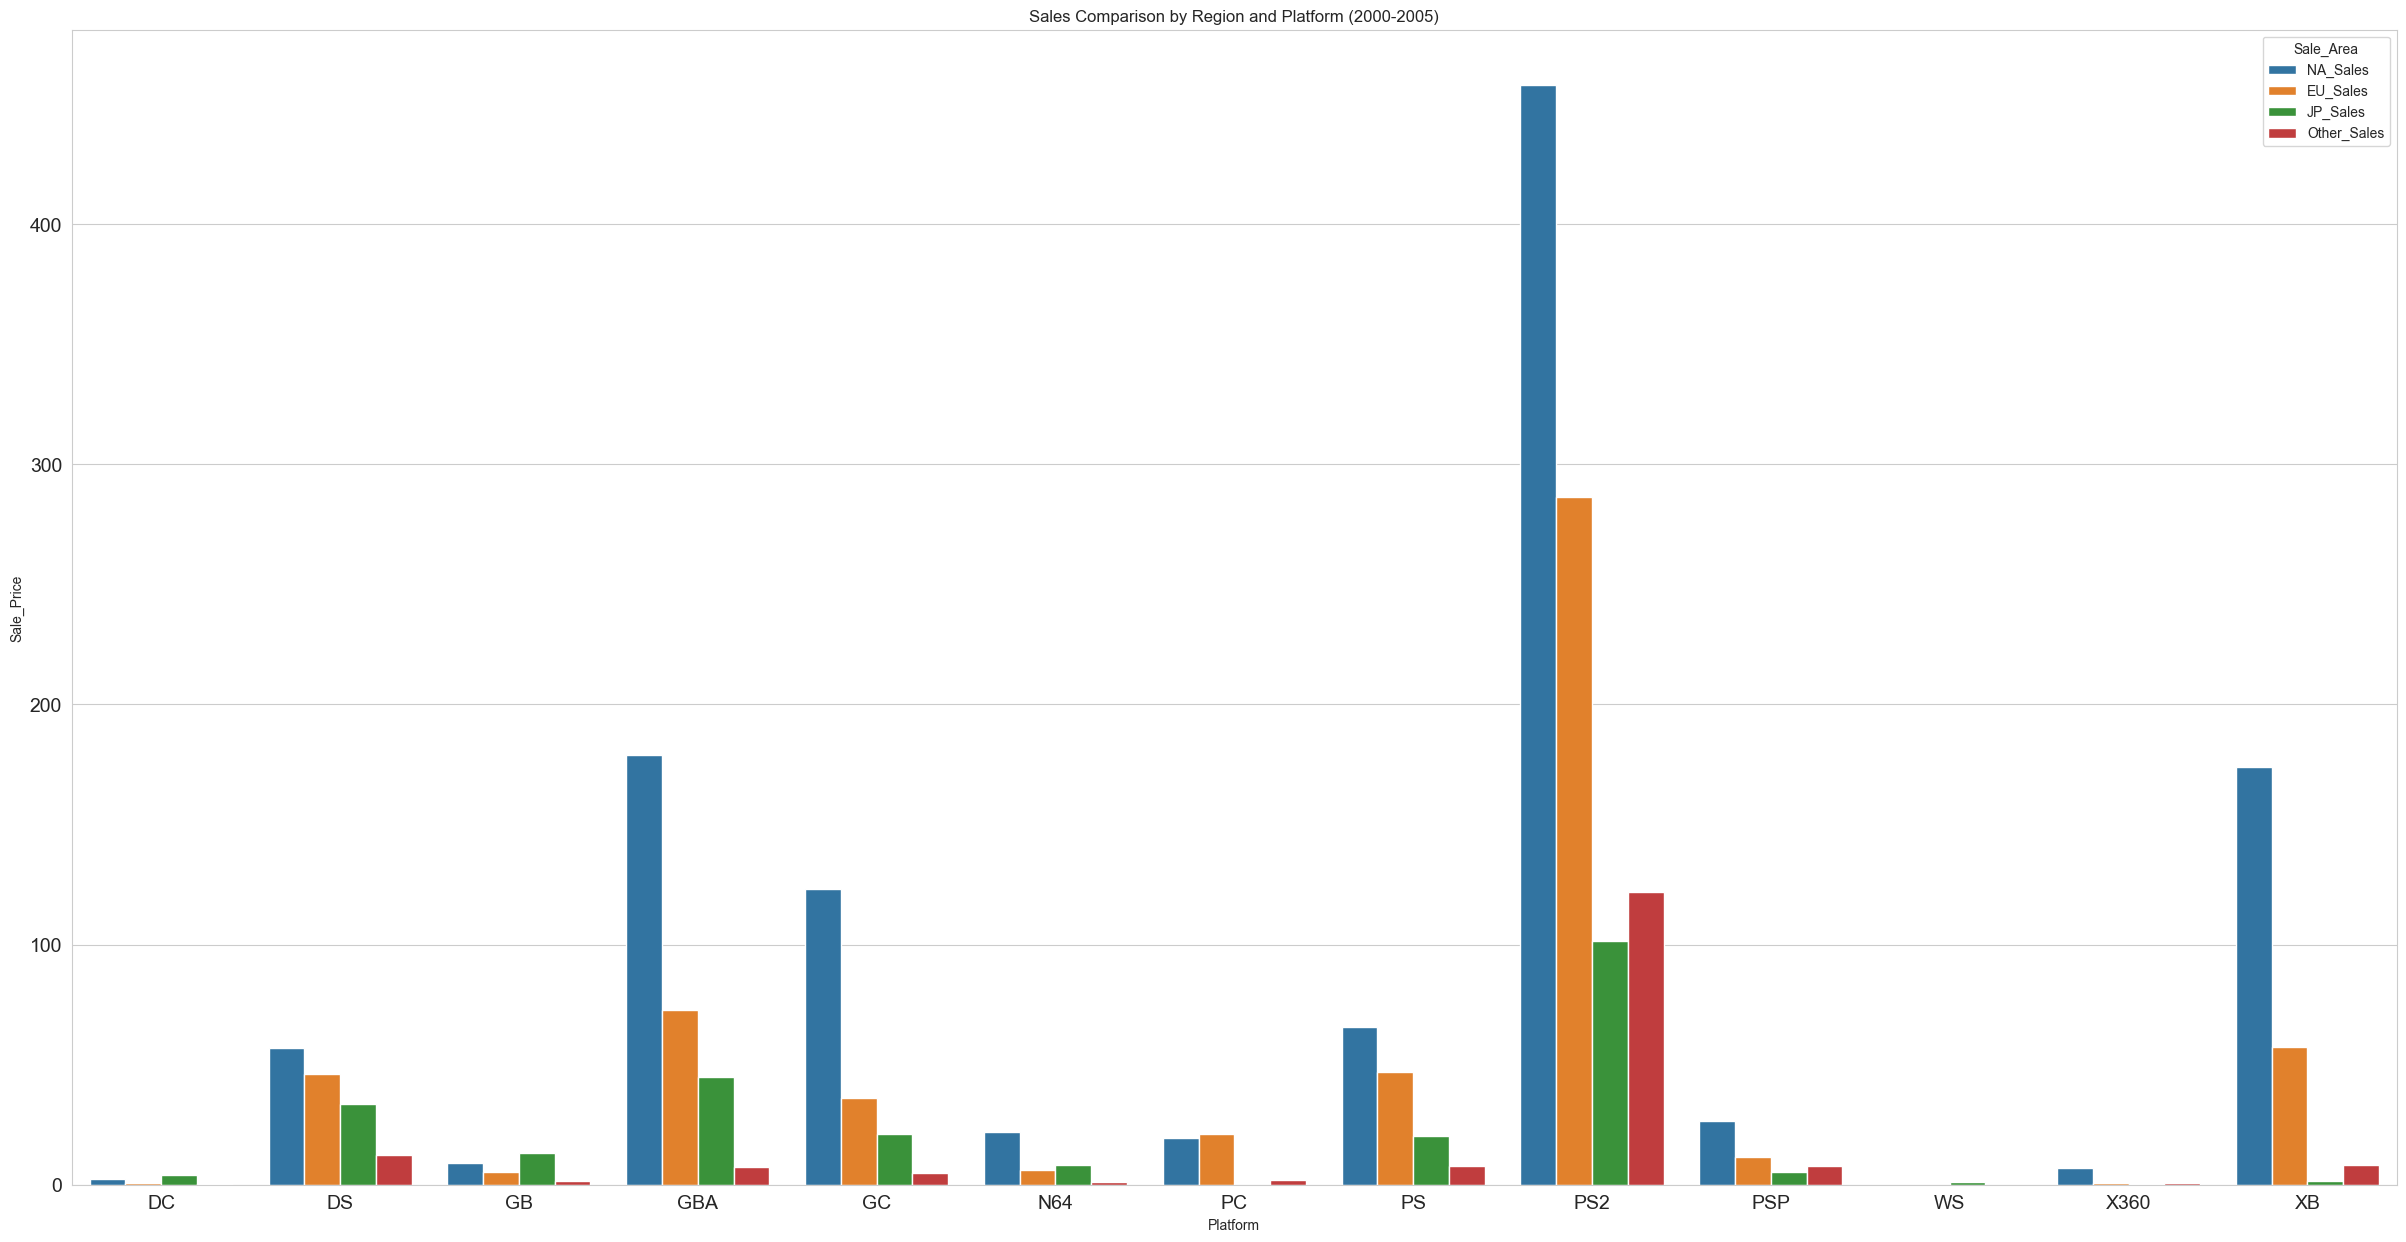

In [3]:
# CSV 파일을 읽어 DataFrame으로 변환
data = pd.read_csv('../00_data/vgsales.csv')

# 2000년부터 2005년까지의 데이터 필터링
data_filtered = data[(data['Year'] >= 2000) & (data['Year'] <= 2005)]

# 1. 플랫폼별 글로벌 매출 합산 및 시각화
data_platform = data_filtered.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

# 2. 지역별 및 플랫폼별 매출 데이터 준비
comp_platform = data_filtered[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 플랫폼별로 지역 매출 합산
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

# 데이터를 melt하여 'Sale_Area'와 'Sale_Price' 컬럼으로 변환
comp_table = pd.melt(comp_platform, id_vars=['Platform'], 
                     value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                     var_name='Sale_Area', value_name='Sale_Price')

# 3. 지역별/플랫폼별 매출 비교 시각화
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sales Comparison by Region and Platform (2000-2005)')
plt.show()


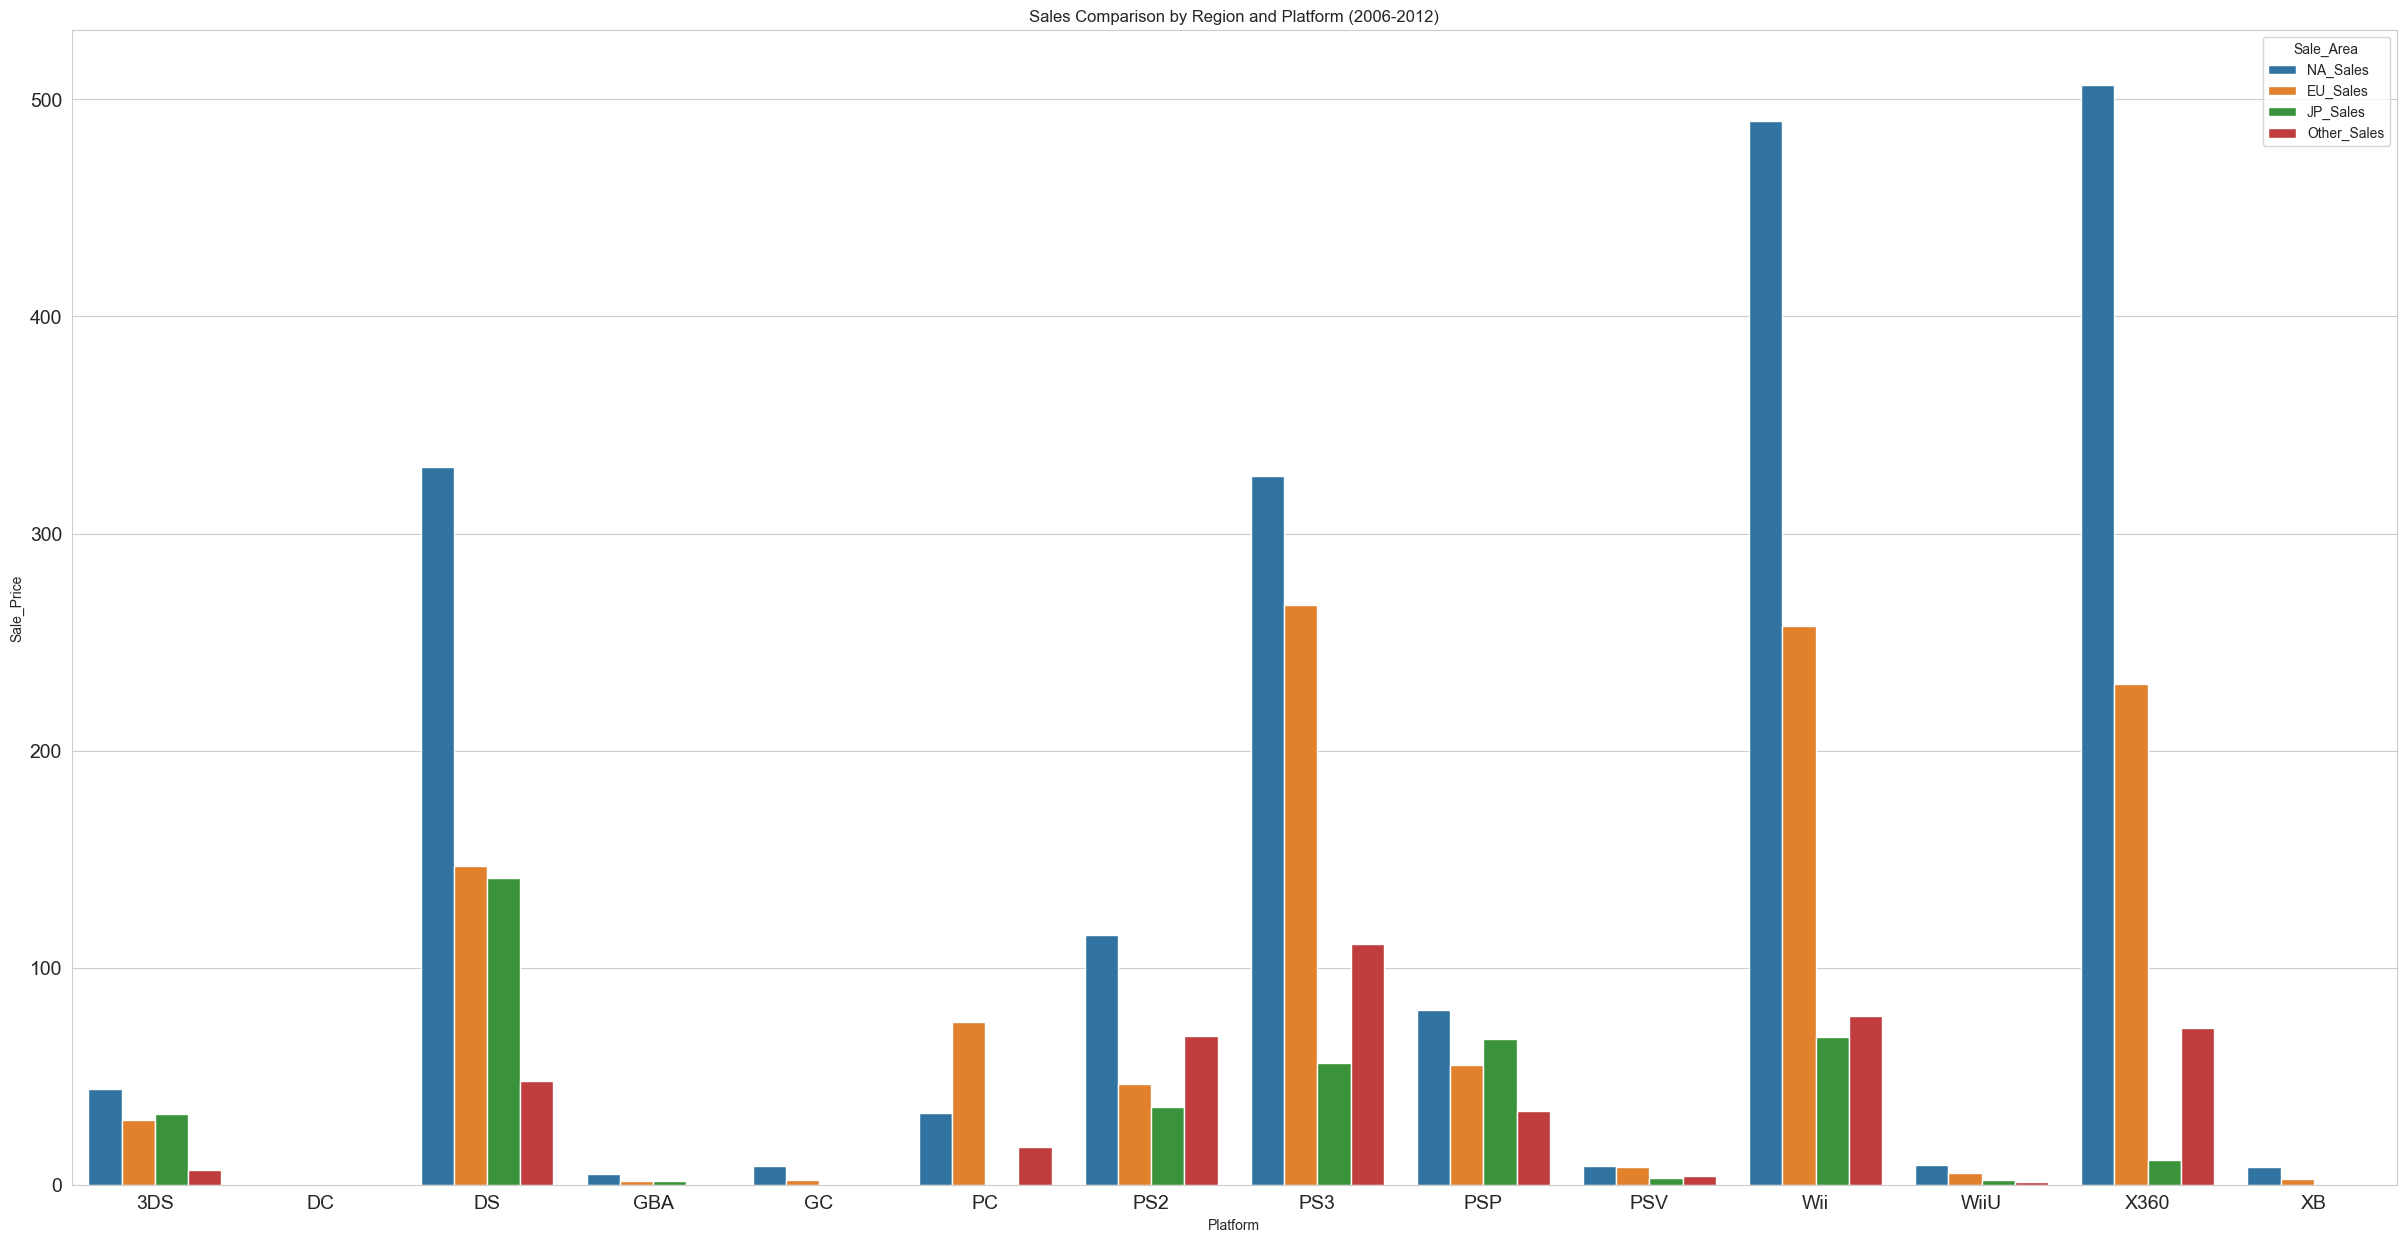

In [4]:
# CSV 파일을 읽어 DataFrame으로 변환
data = pd.read_csv('../00_data/vgsales.csv')

# 2006년부터 2012년까지의 데이터 필터링
data_filtered = data[(data['Year'] >= 2006) & (data['Year'] <= 2012)]

# 1. 플랫폼별 글로벌 매출 합산 및 시각화
data_platform = data_filtered.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

# 2. 지역별 및 플랫폼별 매출 데이터 준비
comp_platform = data_filtered[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 플랫폼별로 지역 매출 합산
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

# 데이터를 melt하여 'Sale_Area'와 'Sale_Price' 컬럼으로 변환
comp_table = pd.melt(comp_platform, id_vars=['Platform'], 
                     value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                     var_name='Sale_Area', value_name='Sale_Price')

# 3. 지역별/플랫폼별 매출 비교 시각화
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sales Comparison by Region and Platform (2006-2012)')
plt.show()
